# Training a ride duration prediction model

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import root_mean_squared_error

In [13]:
def one_hot_encoding(df, categorical, dv=None):
    df[categorical] = df[categorical].astype(str)

    df_dicts = df.to_dict(orient='records')

    if not dv:
        dv = DictVectorizer()
        dv.fit(df_dicts)
    
    X = pd.DataFrame(
        data=dv.transform(df_dicts).toarray(),
        columns=dv.feature_names_
    )

    return X, dv

In [18]:
def preprocessing(url, categorical, numerical, dv=None):
    # read in the raw data
    df = pd.read_parquet(url)
    df[categorical] = df[categorical].astype(str)

    # compute duration of a trip in minutes and minutes
    df['duration'] = (df.lpep_dropoff_datetime - df.lpep_pickup_datetime) / pd.Timedelta(minutes=1)
    df = df.loc[(df.duration >= 1) & (df.duration <= 60)]

    df = df[categorical + numerical + ['duration']]

    df['PU_DO'] = df.PULocationID.str.cat(df.DOLocationID, sep='_')
    # categorical.append('PU_DO')
    categorical = ['PU_DO']

    X, dv = one_hot_encoding(df, categorical, dv=dv)

    y = X.duration
    X.drop('duration', axis=1, inplace=True)

    return X, y, dv
    

In [19]:
url_train = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet"
url_val = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet"

In [20]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [21]:
X_train, y_train, dv = preprocessing(url=url_train, categorical=categorical, numerical=numerical, dv=None)
X_val, y_val, _ = preprocessing(url=url_val, categorical=categorical, numerical=numerical, dv=dv)

: 

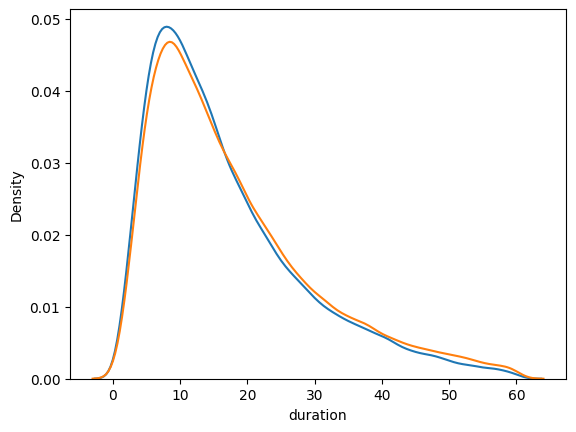

In [ ]:
sns.kdeplot(x=y_train)
sns.kdeplot(x=y_val)
plt.show()

In [ ]:
def train_and_evaluate(X_train, y_train, X_val, y_val, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    rmse = root_mean_squared_error(y_val, y_pred)
    print(f"Validation RMSE: {rmse:.2f}")

    sns.kdeplot(x=y_pred, legend=True, fill=True)
    sns.kdeplot(x=y_val, legend=True, fill=True)
    plt.title("Distribution of taxi drip durations")
    plt.show()

Validation RMSE: 10.47


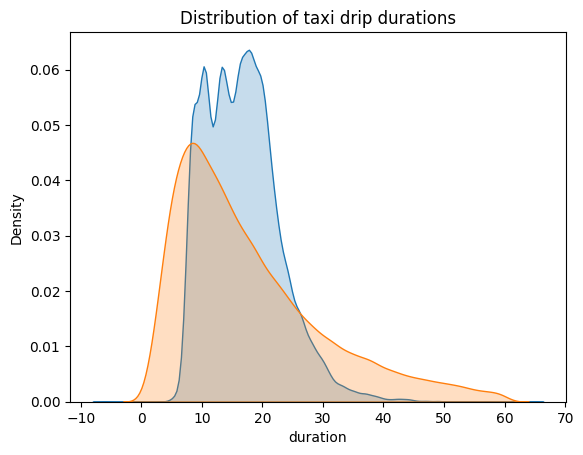

In [ ]:
lr = LinearRegression()
train_and_evaluate(X_train, y_train, X_val, y_val, lr)

Validation RMSE: 10.81


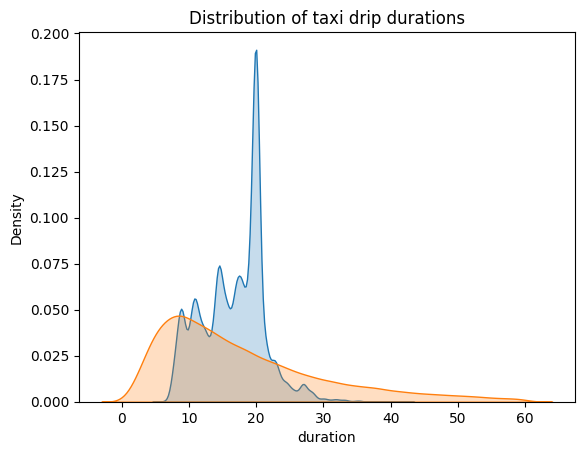

In [ ]:
lr = Lasso(alpha=.01)
train_and_evaluate(X_train, y_train, X_val, y_val, lr)

Validation RMSE: 10.47


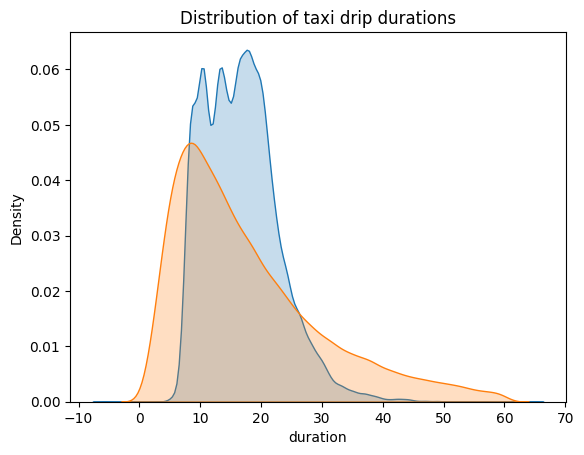

In [ ]:
lr = Ridge(alpha=.01)
train_and_evaluate(X_train, y_train, X_val, y_val, lr)